# **Import Necessary Packages and Load DataSet**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
if IN_COLAB:
    data = pd.read_csv('/content/DA_data.csv')      # Need to upload to google colab and change name to 'DA_data.csv'
else:
    data = pd.read_csv('./Inputs/BankChurners.csv')

# **Initial Anaysis Of DataSet**

In [4]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


CHECKING FOR NULL 

In [131]:
data.isnull().any()

CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

No NUll values are present in the dataset

In [132]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

The data has no duplicate values also

Removing unneccesary comlumns

In [133]:
#data = data.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
data = data.iloc[:,0:21]

PREPROCESSING OF THE DATA(checking for the null,missing data,removing col)

In [134]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


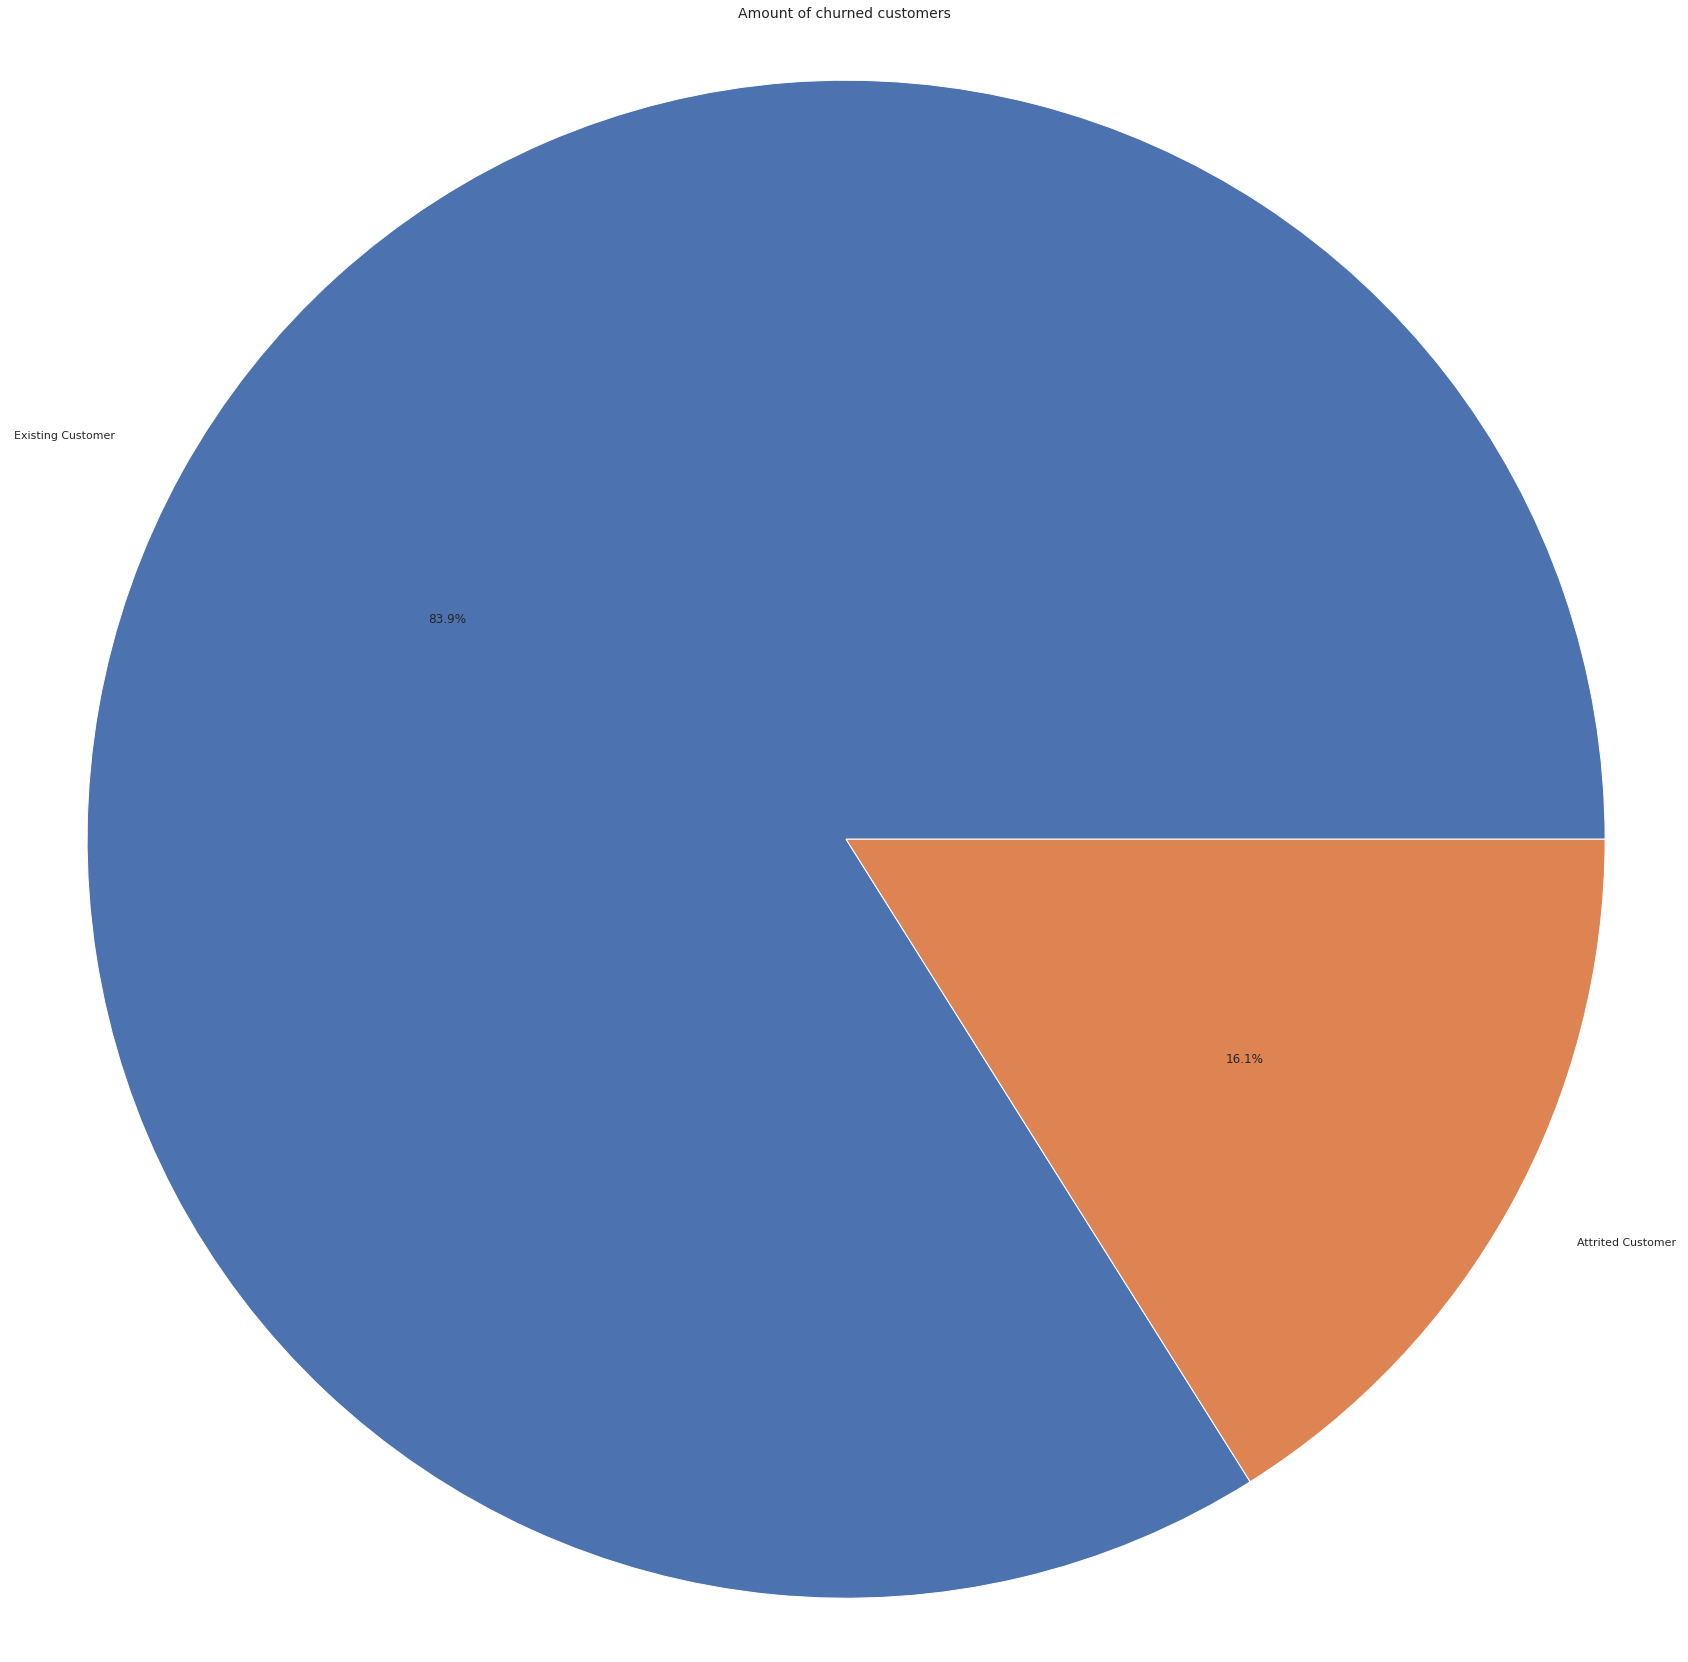

In [135]:
target = data["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots(1,1,figsize = (10,10))

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

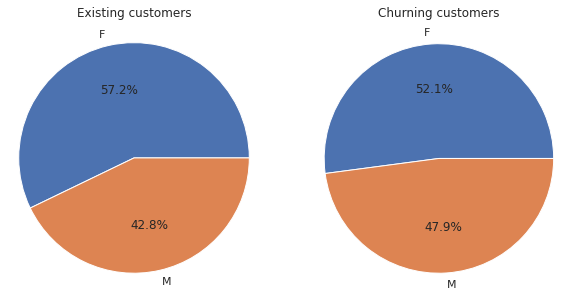

In [136]:
churned = data[data['Attrition_Flag'] == "Attrited Customer"]
nonchurned = data[data['Attrition_Flag'] == "Existing Customer"]
churnedtarget = churned["Gender"].value_counts()
nonchurnedtarget = nonchurned["Gender"].value_counts()

fig1, axs = plt.subplots(1, 2,figsize = (10,5))
axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

# **Attributes and Churned vs Existing Count**

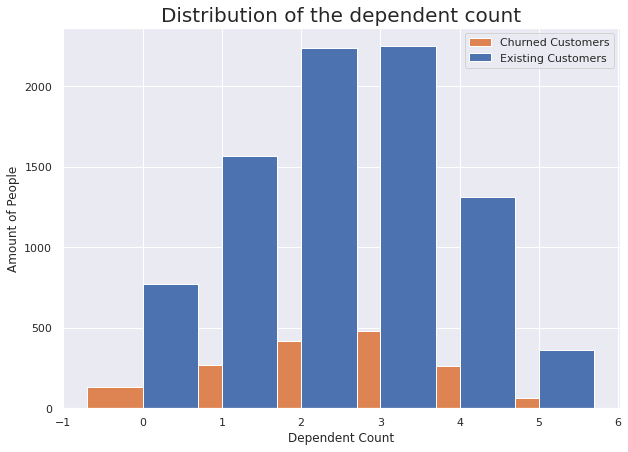

In [137]:
N = 6
ChurnedCounts = churned["Dependent_count"].value_counts().sort_index()
NonChurnedCounts = nonchurned["Dependent_count"].value_counts().sort_index()

ind = np.arange(N)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

figs, axs = plt.subplots(figsize=(10,7))

axs.bar(ind - width/2, ChurnedCounts, width, color = "#DD8452")
axs.bar(ind + width/2, NonChurnedCounts, width)

axs.set_xlabel('Dependent Count')
axs.set_ylabel('Amount of People')
axs.set_title('Distribution of the dependent count', fontsize=20)
axs.legend(('Churned Customers','Existing Customers',))

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


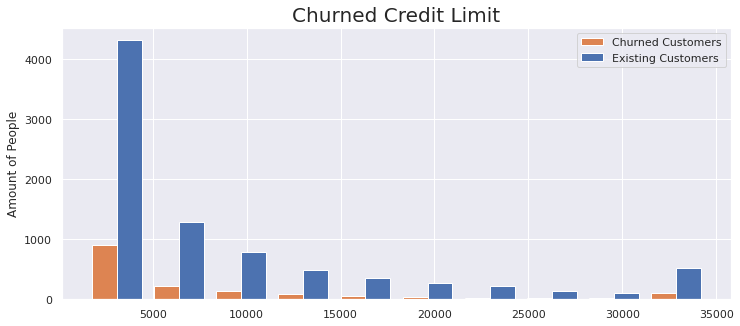

In [138]:
column = "Credit_Limit"
category_name = "Credit Limit" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8452','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


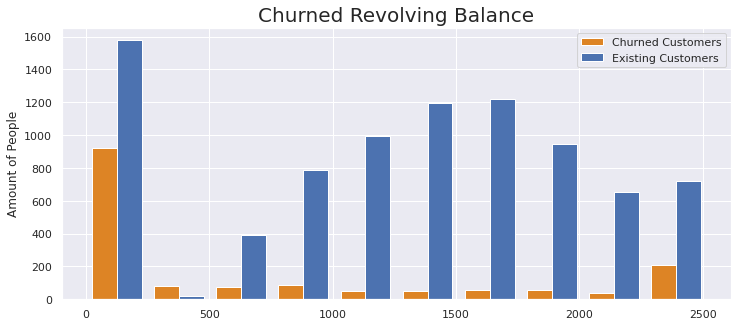

In [139]:
column = "Total_Revolving_Bal"
category_name = "Revolving Balance" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425', 'b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


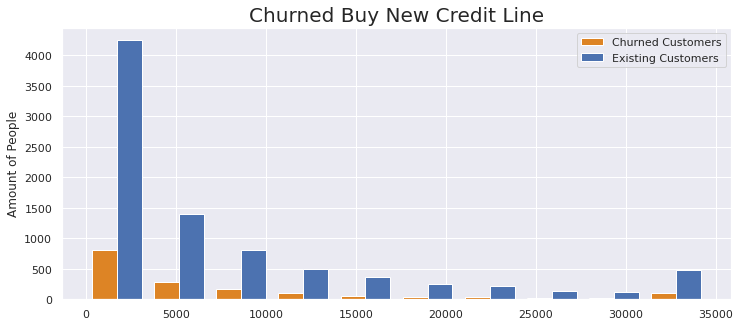

In [140]:
column = "Avg_Open_To_Buy"
category_name = "Buy New Credit Line" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425', 'b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


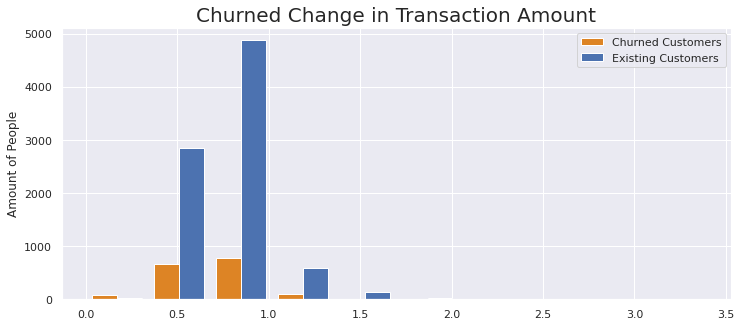

In [141]:
column = "Total_Amt_Chng_Q4_Q1"
category_name = "Change in Transaction Amount" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


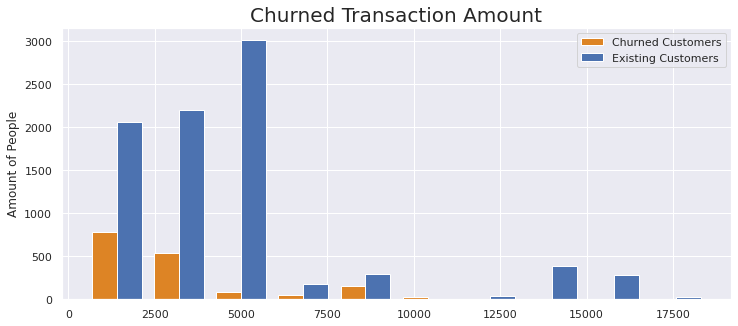

In [142]:
column = "Total_Trans_Amt"
category_name = "Transaction Amount" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


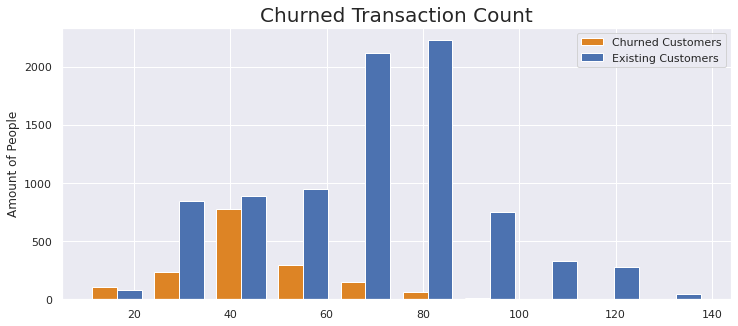

In [143]:
column = "Total_Trans_Ct"
category_name = "Transaction Count" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


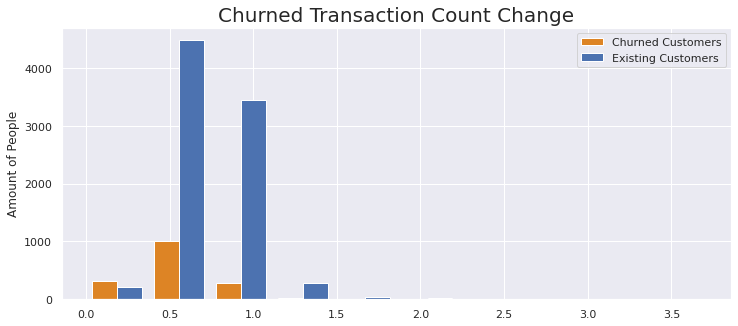

In [144]:
column = "Total_Ct_Chng_Q4_Q1"
category_name = "Transaction Count Change" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


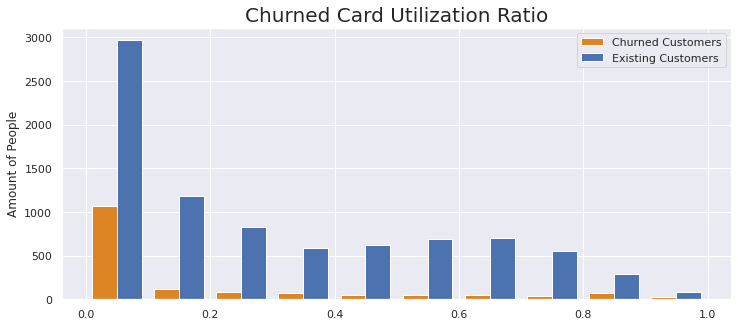

In [145]:
column = "Avg_Utilization_Ratio"
category_name = "Card Utilization Ratio" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

In [146]:
NumericalColumns = data.select_dtypes(exclude='object').columns.tolist()
CategoricalColumns = data.select_dtypes(include='object').columns.tolist()
print("Numerical Columns: \n" ,NumericalColumns)
print("\nCategorical Columns: \n",CategoricalColumns)

Numerical Columns: 
 ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical Columns: 
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [147]:
for i in CategoricalColumns:
    print(i,'\n',data[i].unique(),'\n\n',data[i].value_counts(),'\n')

Attrition_Flag 
 ['Existing Customer' 'Attrited Customer'] 

 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Gender 
 ['M' 'F'] 

 F    5358
M    4769
Name: Gender, dtype: int64 

Education_Level 
 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Marital_Status 
 ['Married' 'Single' 'Unknown' 'Divorced'] 

 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Income_Category 
 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 

 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Card_Category 
 ['Blue' 'Gold

# **Numerical Column Data Analytics**

> ## **Checking Distribution of every Numerical column in the dataset**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95e73b3290>,
      dtype=object)

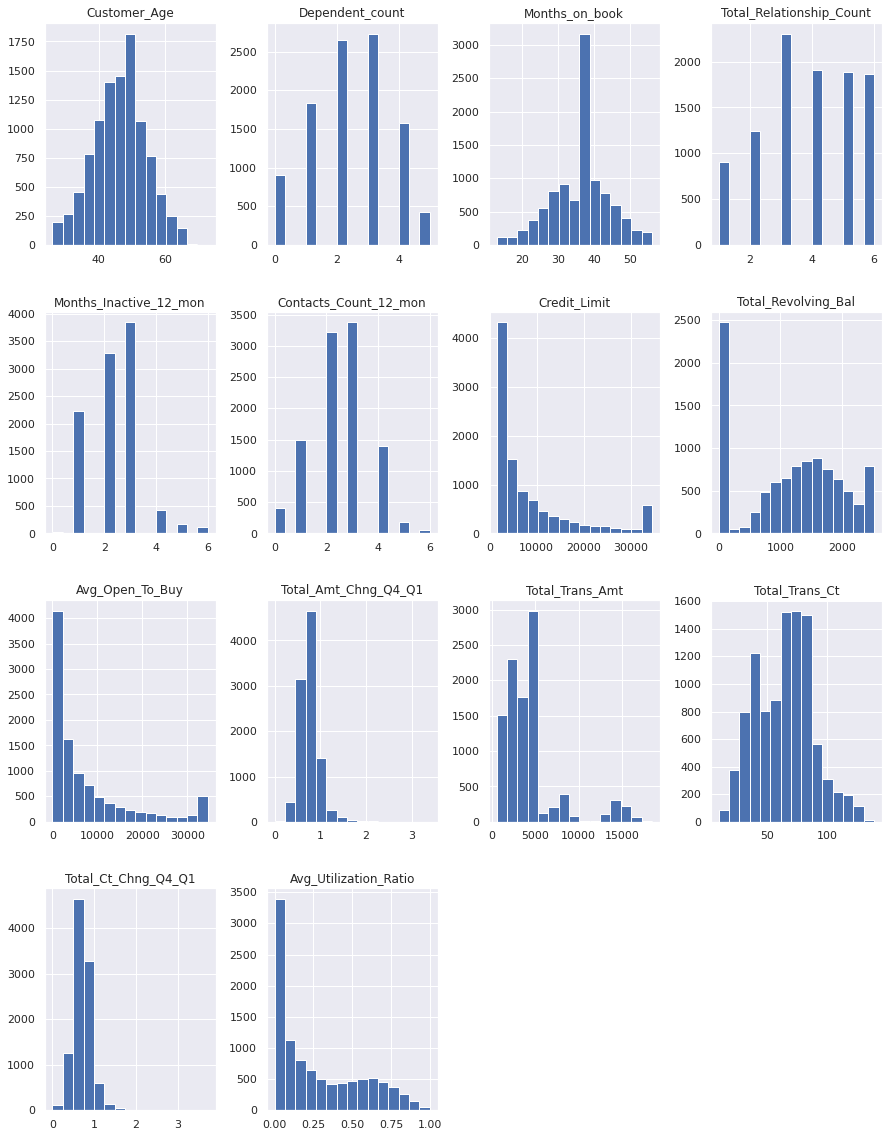

In [148]:
data[NumericalColumns[1:]].hist(bins=15, figsize=(15, 20))

> ## **Kernel Density plot for Numerical Features**

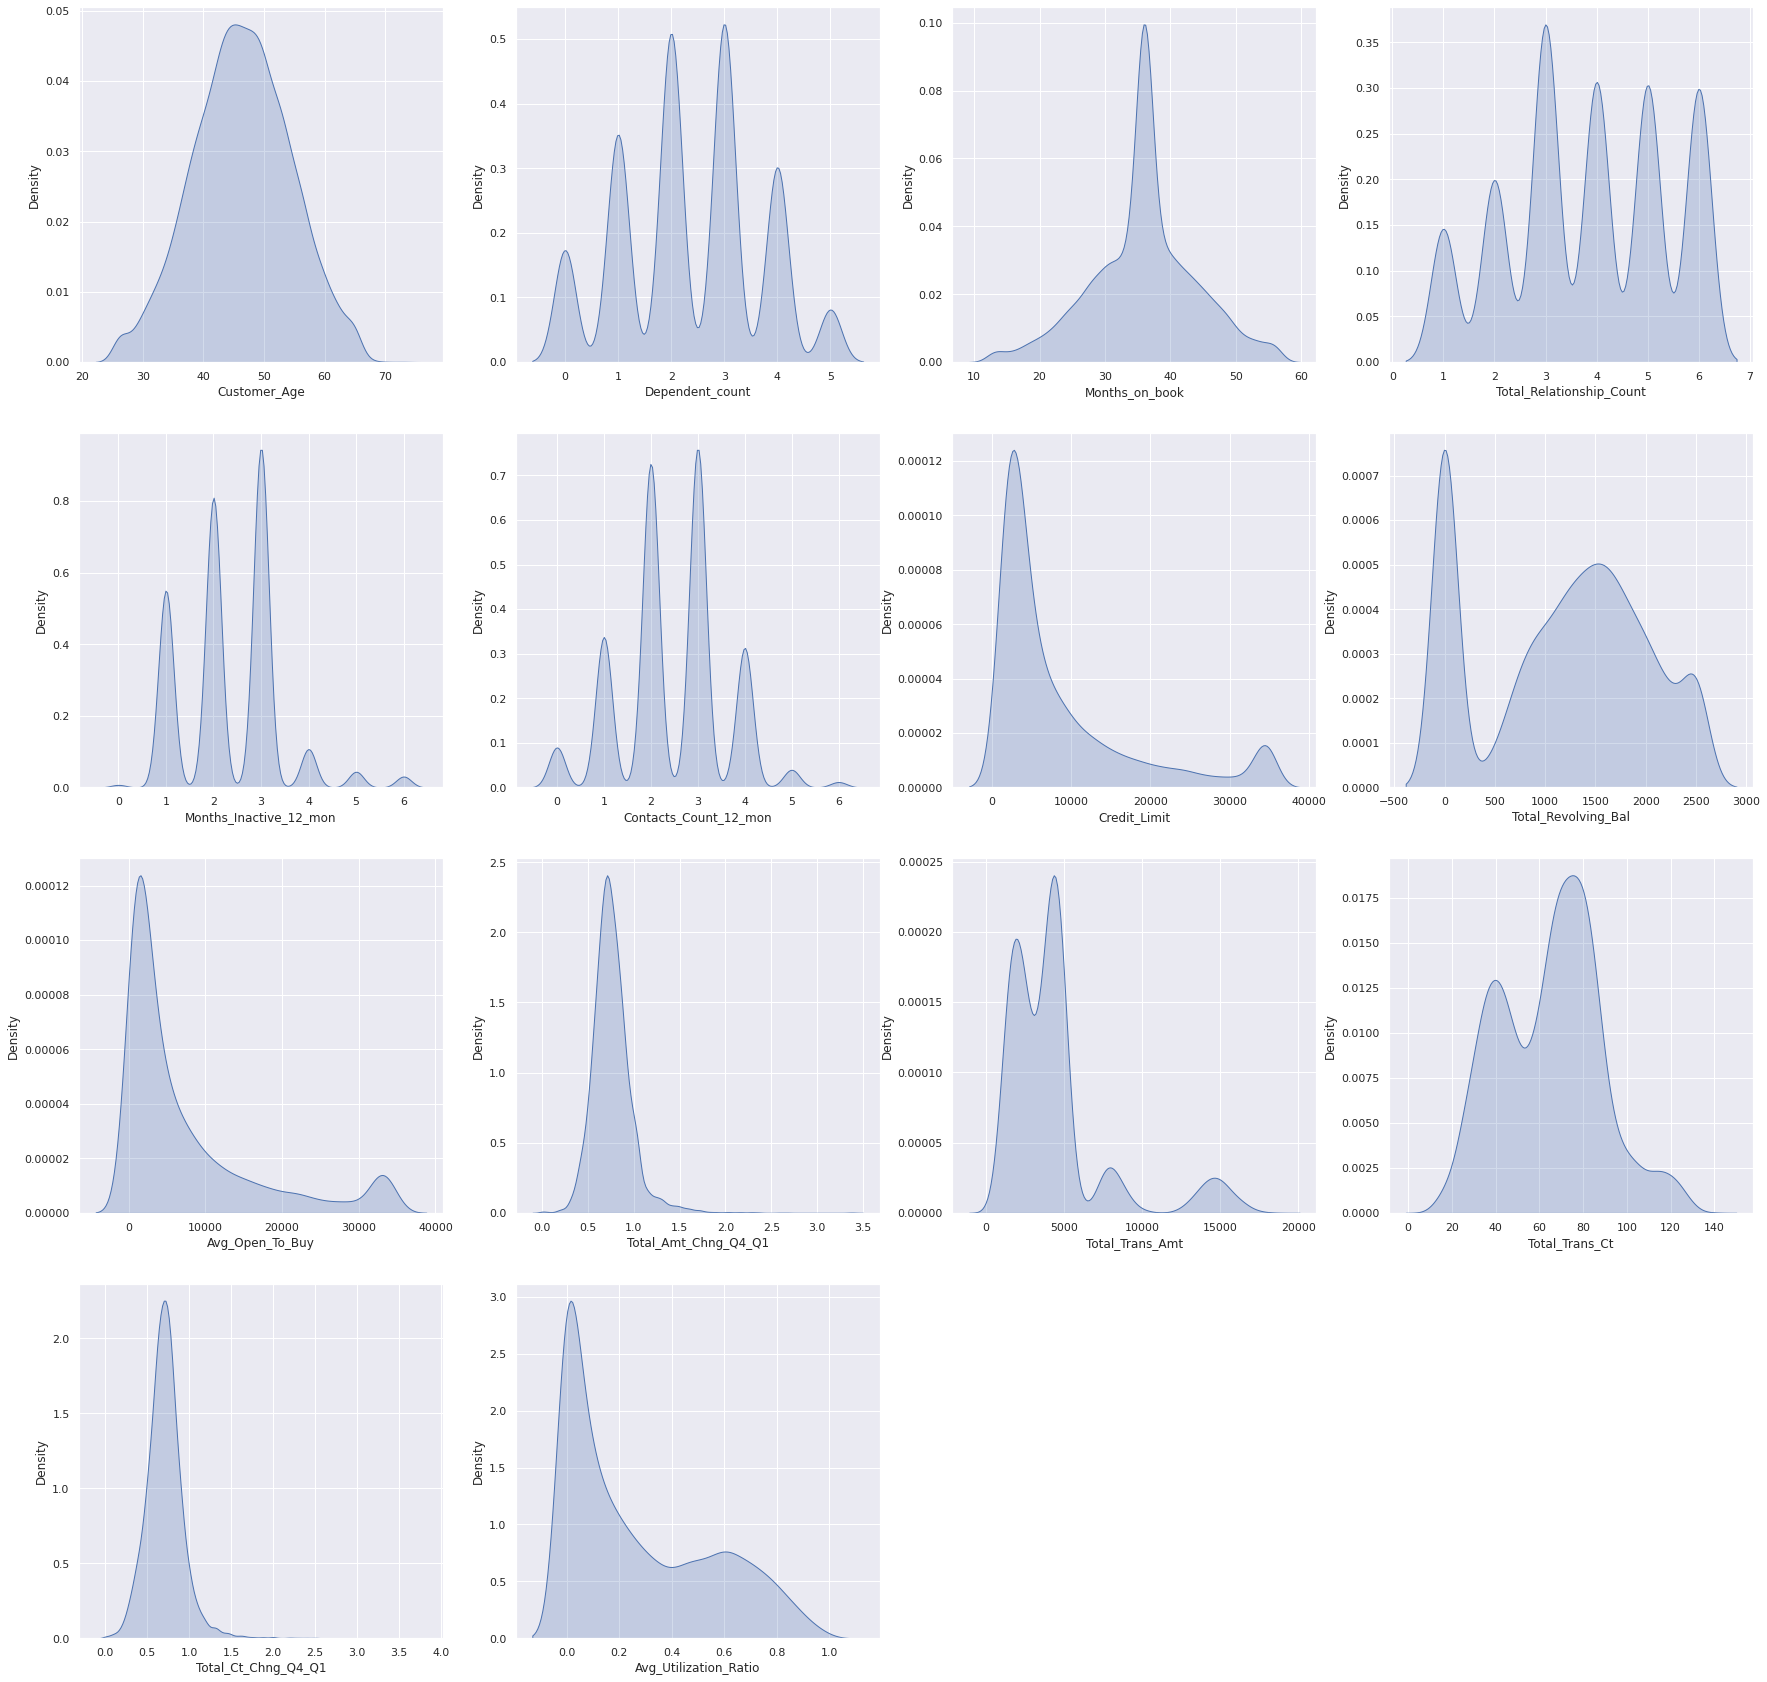

In [149]:
sns.set(rc={'figure.figsize': (30, 30)})
for i in range(1,len(NumericalColumns)):
    plt.subplot(4, 4, (i-1) + 1)
    sns.kdeplot(data[NumericalColumns[i]], shade=True)

> ## **Data Description for every Numerical Column**

In [150]:
data.describe().iloc[:,1:]  # Removing 1st Column as doesn't have any numerical value wrt count,mean etc

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


> ## **Box Plots of Numerical Columns with respect to Attrition Flag**

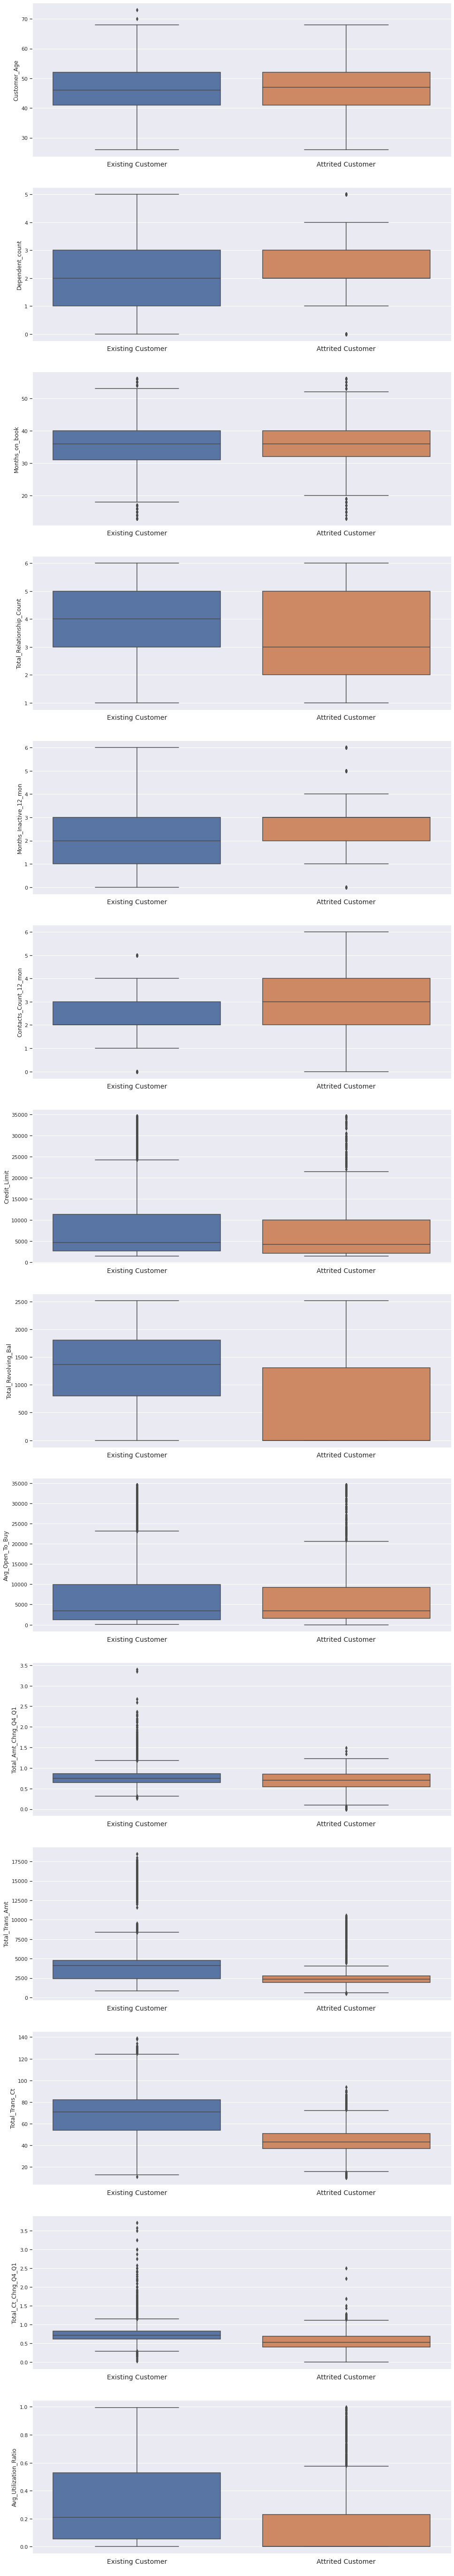

In [151]:
fig, ax = plt.subplots(nrows=14, figsize=(16, 100))
i = 0 #counter
for cols in NumericalColumns[1:]:
  sns.boxplot(data = data, y=cols, x='Attrition_Flag', ax=ax[i])
  ax[i].set_xlabel(' ')
  ax[i].xaxis.set_tick_params(labelsize=14)
  ax[i].tick_params(left=True, labelleft=True)
  ax[i].set_ylabel(cols, fontsize=12)
  i=i+1

> ## **Collinearity Check**

[Text(0, 0.5, 'CLIENTNUM'),
 Text(0, 1.5, 'Customer_Age'),
 Text(0, 2.5, 'Dependent_count'),
 Text(0, 3.5, 'Months_on_book'),
 Text(0, 4.5, 'Total_Relationship_Count'),
 Text(0, 5.5, 'Months_Inactive_12_mon'),
 Text(0, 6.5, 'Contacts_Count_12_mon'),
 Text(0, 7.5, 'Credit_Limit'),
 Text(0, 8.5, 'Total_Revolving_Bal'),
 Text(0, 9.5, 'Avg_Open_To_Buy'),
 Text(0, 10.5, 'Total_Amt_Chng_Q4_Q1'),
 Text(0, 11.5, 'Total_Trans_Amt'),
 Text(0, 12.5, 'Total_Trans_Ct'),
 Text(0, 13.5, 'Total_Ct_Chng_Q4_Q1'),
 Text(0, 14.5, 'Avg_Utilization_Ratio')]

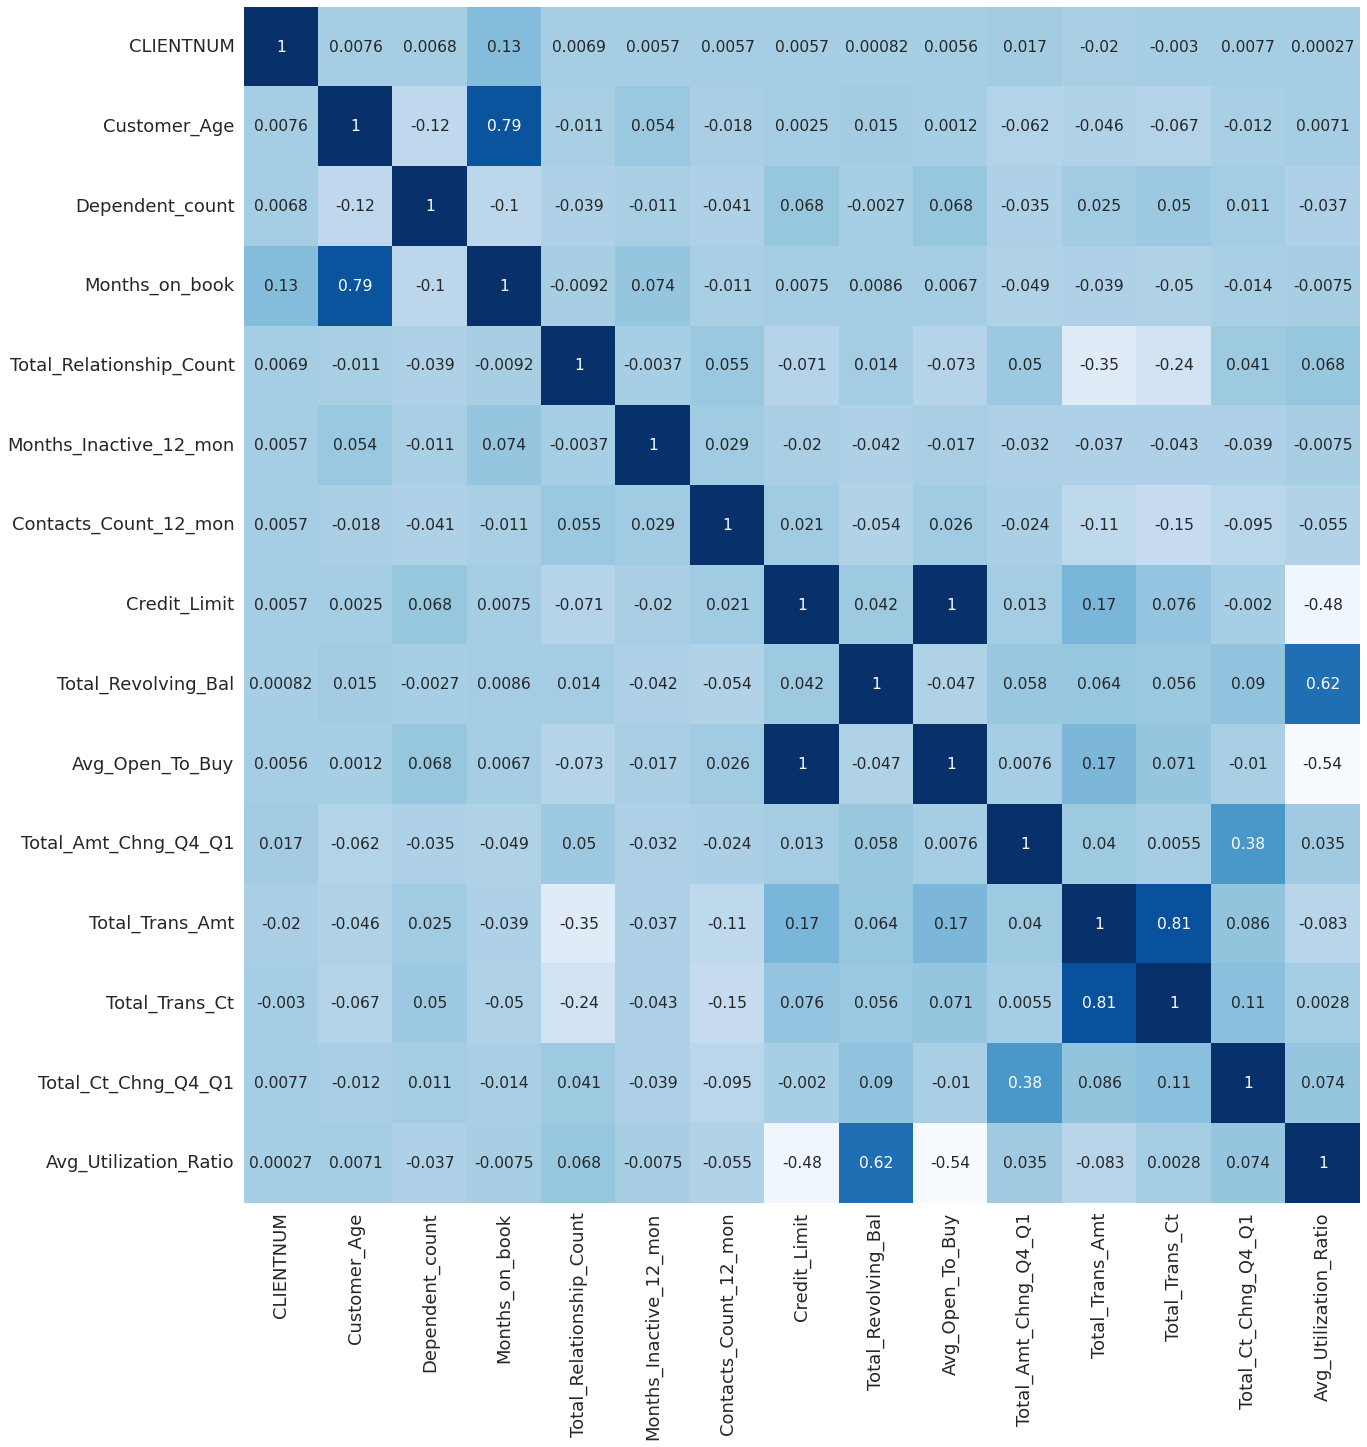

In [152]:
fig, ax = plt.subplots( figsize = (20,22) )
res = sns.heatmap( data.corr(), cmap='Blues', annot=True, ax = ax, annot_kws={"size": 15.5}, cbar=False)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

In [153]:
PositiveCorrelationresults = data.corr()[ (data.corr() > 0.3)]  # Correlation coefficient values below 0.3 are considered to be weak; 0.3-0.7 are moderate; >0.7 are strong
PositiveCorrelationresults

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,NaN,1.000000,NaN,0.788912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,NaN,0.788912,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Relationship_Count,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_Inactive_12_mon,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contacts_Count_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.995981,NaN,NaN,NaN,NaN,NaN
Total_Revolving_Bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.624022
Avg_Open_To_Buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995981,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [154]:
NegativeCorrelationresults = data.corr()[ (data.corr() < -0.3)]  
NegativeCorrelationresults

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Relationship_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.347229,NaN,NaN,NaN
Months_Inactive_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contacts_Count_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.482965
Total_Revolving_Bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Open_To_Buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.538808


The output dataframes can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. As mentioned earlier, that the correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00.

**Note: NaN Values suggest that the correlation between the columns are not significant enough to be considered**. It doesn't specify that there is no correlation among the variables

> ## **Scatter Plots based on Above Results**

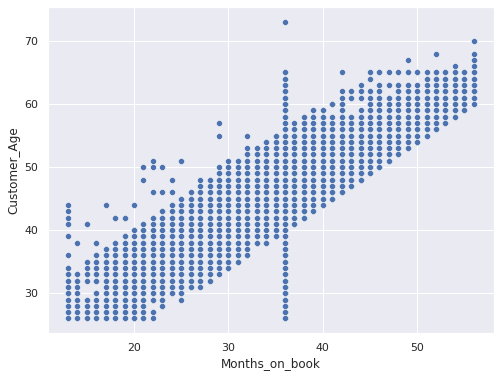

In [155]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Months_on_book', y='Customer_Age', data = data)

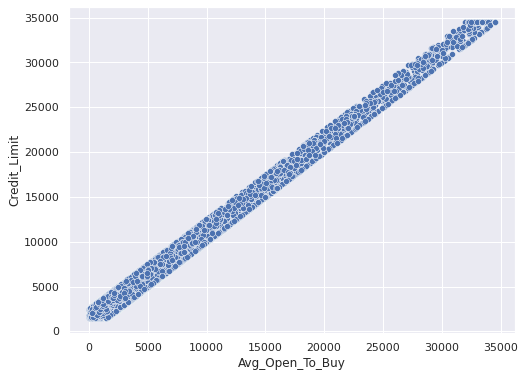

In [156]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Avg_Open_To_Buy', y='Credit_Limit', data = data)

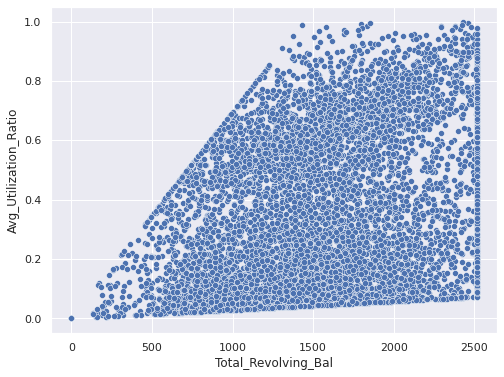

In [157]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', data = data)

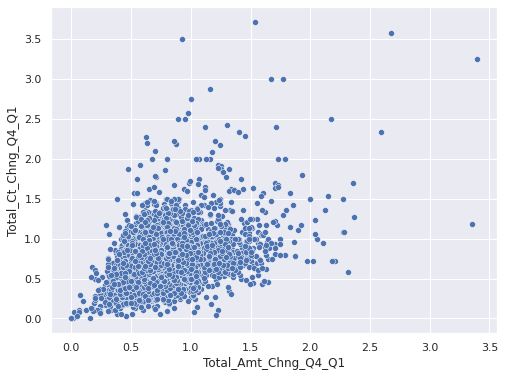

In [158]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', data = data)

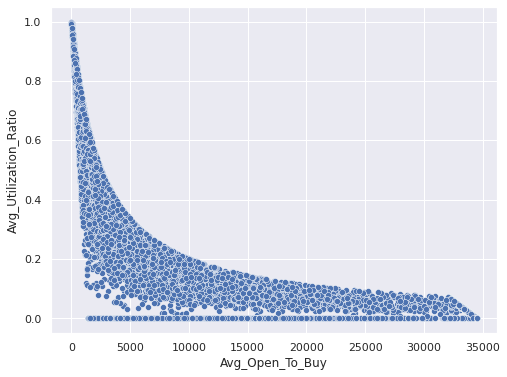

In [159]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Avg_Open_To_Buy', y='Avg_Utilization_Ratio', data = data)

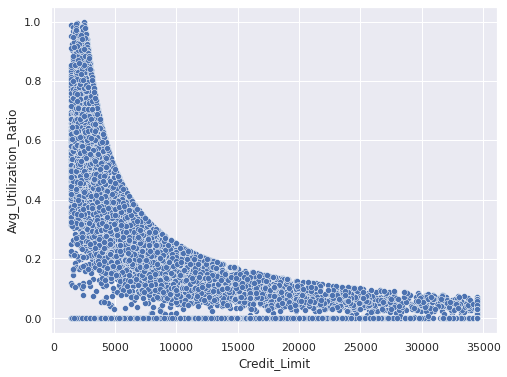

In [160]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='Credit_Limit', y='Avg_Utilization_Ratio', data = data)

# **Categorical Column Data Analytics**

> ## **Count Plots for Each Categorical Attributes**

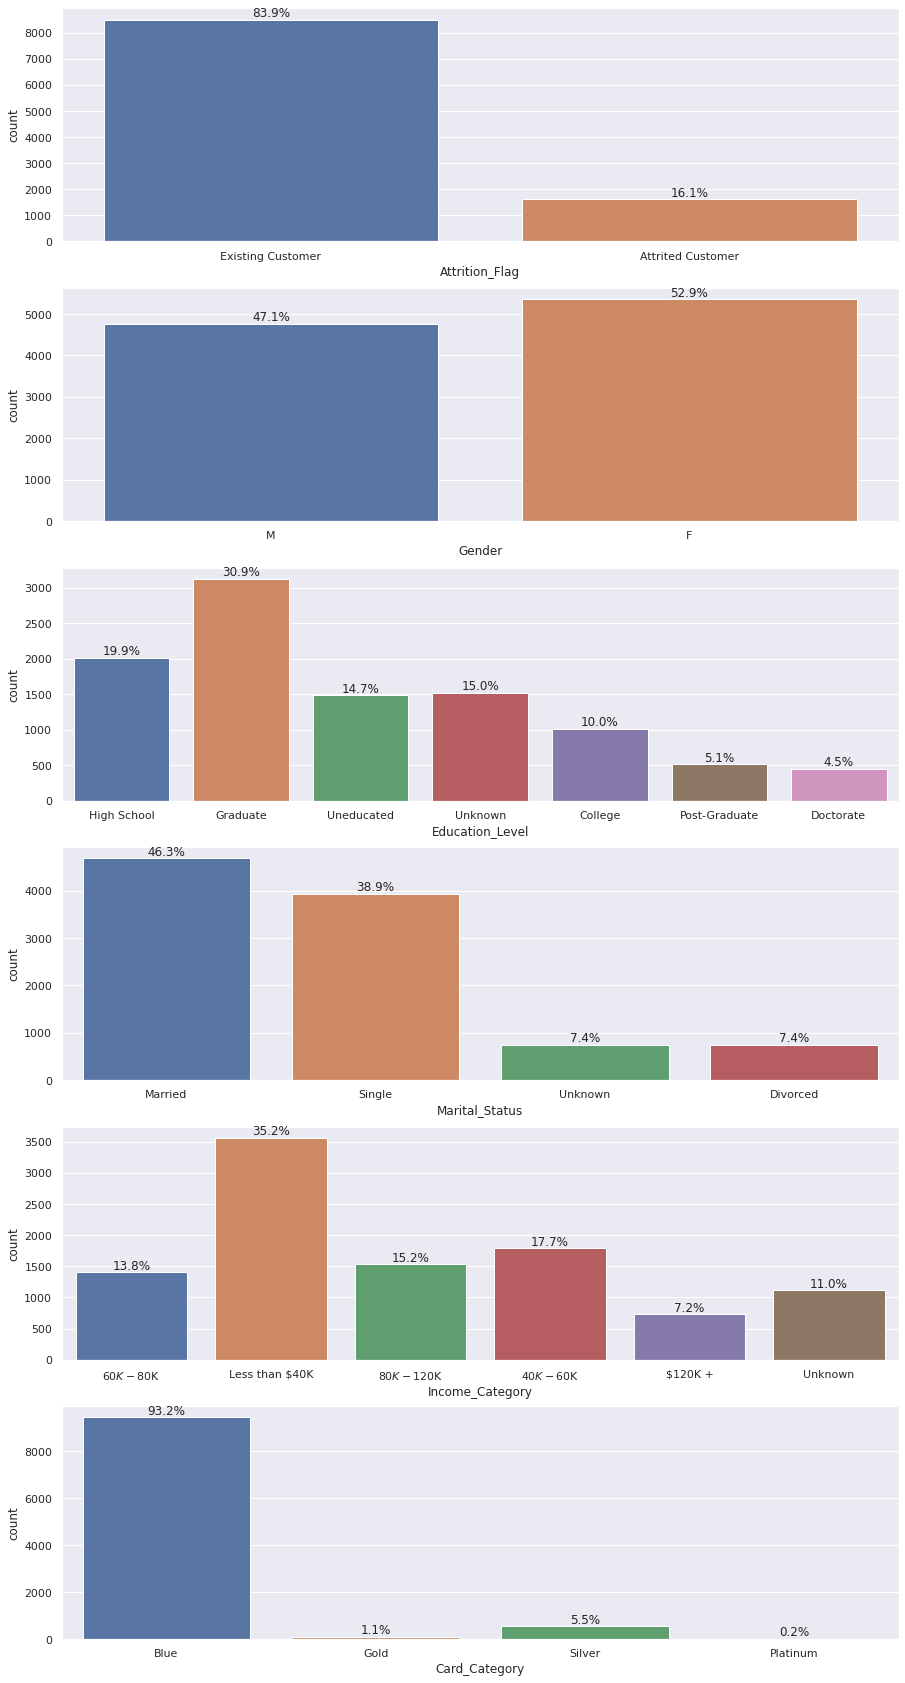

In [161]:
fig,ax = plt.subplots(6,1,figsize = (15,30))

for attr,plot in zip(CategoricalColumns,ax.flatten()):
  CountPlt = sns.countplot(x = data[attr],ax = plot)
  for p in CountPlt.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ncount = len(data[attr])
    CountPlt.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
